In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


In [4]:
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0


In [36]:
camp1=pd.read_csv('First_Health_Camp_Attended.csv')
camp2=pd.read_csv('Second_Health_Camp_Attended.csv')
camp3=pd.read_csv('Third_Health_Camp_Attended.csv')

In [6]:
test

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0
...,...,...,...,...,...,...,...,...
35244,507261,6525,13-Apr-06,12,2,0,0,6
35245,513607,6551,03-Nov-06,0,0,0,0,0
35246,498160,6584,17-Jun-06,0,0,0,0,0
35247,502444,6567,13-Jan-07,0,0,0,0,0


In [7]:
camp3.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,510954,6528,2,2


In [6]:
patient=pd.read_csv('Patient_Profile.csv')

In [10]:
patient.columns

Index(['Patient_ID', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category'],
      dtype='object')

In [11]:
pat=patient[['Patient_ID', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score','City_Type', 'Employer_Category']]

In [37]:
camp3['fav']=camp3['Number_of_stall_visited'].apply(lambda x:0 if x<1 else 1)

In [38]:
camp1['fav']=camp1['Health_Score'].apply(lambda x:1 if x>0 else 0)

In [39]:
camp2['fav']=camp2['Health Score'].apply(lambda x:1 if x>0 else 0)

In [40]:
camp1=camp1[['Patient_ID','Health_Camp_ID','fav']]
camp2=camp2[['Patient_ID','Health_Camp_ID','fav']]
camp3=camp3[['Patient_ID','Health_Camp_ID','fav']]

In [41]:
camp1

,Patient_ID,Health_Camp_ID,fav
0,506181,6560,1
1,494977,6560,1
2,518680,6560,1
3,509916,6560,1
4,488006,6560,1
...,...,...,...
6213,502728,6575,1
6214,511088,6575,1
6215,507608,6575,1
6216,488046,6575,1


In [42]:
camp=pd.concat([camp1,camp2])

In [43]:
camp

,Patient_ID,Health_Camp_ID,fav
0,506181,6560,1
1,494977,6560,1
2,518680,6560,1
3,509916,6560,1
4,488006,6560,1
...,...,...,...
7814,490853,6529,1
7815,499836,6529,1
7816,511286,6529,1
7817,522935,6529,1


In [44]:
camp=pd.concat([camp,camp3])

In [45]:
camp=camp.reset_index()

In [46]:
camp.drop(['index'],axis=1,inplace=True)

In [52]:
train['Var4'].value_counts()

0    74134
1      717
2      323
3       91
4       13
Name: Var4, dtype: int64

In [49]:
import seaborn as sns

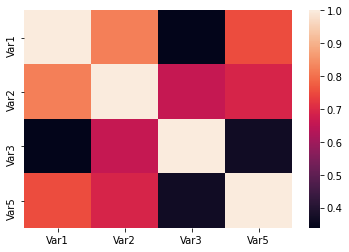

In [53]:
sns.heatmap(train[['Var1','Var2','Var3','Var5']].corr())

In [54]:
train1=pd.merge(train,camp,how='left',on='Patient_ID Health_Camp_ID'.split())

In [55]:
train1

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,fav
0,489652,6578,10-Sep-05,4,0,0,0,2,1.0
1,507246,6578,18-Aug-05,45,5,0,0,7,NaN
2,523729,6534,29-Apr-06,0,0,0,0,0,1.0
3,524931,6535,07-Feb-04,0,0,0,0,0,NaN
4,521364,6529,28-Feb-06,15,1,0,0,7,1.0
...,...,...,...,...,...,...,...,...,...
75273,500969,6539,03-Jan-05,0,0,0,0,0,NaN
75274,511952,6528,13-Feb-06,0,0,0,0,0,1.0
75275,521236,6554,24-May-05,0,0,0,0,0,1.0
75276,518817,6580,22-Dec-04,0,0,0,0,0,NaN


In [58]:
from lightgbm import LGBMClassifier

In [56]:
train1['fav']=train1['fav'].fillna(0)

In [57]:
from sklearn.model_selection import GridSearchCV

In [59]:
lgb1=LGBMClassifier()
lgb2=LGBMClassifier()
lgb3=LGBMClassifier()

In [72]:
t1=pd.DataFrame(columns=train.columns)
t2=pd.DataFrame(columns=train.columns)
t3=pd.DataFrame(columns=train.columns)

In [79]:
for i in range(len(train)):
    d=train1.iloc[i]
    if d['Health_Camp_ID'] in camp1['Health_Camp_ID'].values:
        t1=t1.append(d)
    elif d['Health_Camp_ID'] in camp2['Health_Camp_ID'].values:
        t2=t2.append(d)
    else:
        t3=t3.append(d)

In [81]:
t1=t1.reset_index()
t2=t2.reset_index()
t3=t3.reset_index()

In [85]:
train

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7
...,...,...,...,...,...,...,...,...
75273,500969,6539,03-Jan-05,0,0,0,0,0
75274,511952,6528,13-Feb-06,0,0,0,0,0
75275,521236,6554,24-May-05,0,0,0,0,0
75276,518817,6580,22-Dec-04,0,0,0,0,0


In [78]:
lgb1.fit(t1.drop(['fav','Registration_Date','Patient_ID','Health_Camp_ID','index'],axis=1),t1['fav'])
lgb2.fit(t1.drop(['fav','Registration_Date','Patient_ID','Health_Camp_ID','index'],axis=1),t2['fav'])
lgb3.fit(t1.drop(['fav','Registration_Date','Patient_ID','Health_Camp_ID','index'],axis=1),t3['fav'])

KeyError: "['fav'] not found in axis"

In [80]:
sub=pd.DataFrame({'Patient_ID':test['Patient_ID'].values,'Health_Camp_ID':test['Health_Camp_ID'].values})

In [ ]:
sub['Outcome']=-1

In [ ]:
for r in range(len(test)):
    d=test.iloc[r]
    if d['Health_Camp_ID'] in camp1['Health_Camp_ID'].values:
        p=lgb1.predict(d)
        sub.iloc[r]['Outcome']=p
    elif d['Health_Camp_ID'] in camp2['Health_Camp_ID'].values:
        p=lgb2.predict(d)
        sub.iloc[r]['Outcome']=p
    else:
        p=lgb3.predict(d)
        sub.iloc[r]['Outcome']=p

In [65]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 64}

In [66]:
pred=grid.predict_proba(test.drop(['Registration_Date','Patient_ID','Health_Camp_ID'],axis=1))

In [67]:
pred.shape

(35249, 2)

In [43]:
p=lgb.predict(test.drop(['Registration_Date','Patient_ID','Health_Camp_ID'],axis=1))

In [44]:
p

array([0., 0., 0., ..., 0., 0., 1.])

In [68]:
p1=pred[:,0]
p2=pred[:,1]

In [69]:
p2

array([0.31085801, 0.26396674, 0.26396674, ..., 0.26396674, 0.26396674,
       0.58508967])

In [55]:
sub=pd.DataFrame(columns='Patient_ID Health_Camp_ID Outcome'.split())

In [56]:
sub['Patient_ID']=test['Patient_ID'].values
sub['Health_Camp_ID']=test['Health_Camp_ID'].values

In [70]:
sub['Outcome']=p2

In [71]:
sub.to_csv('Mysub3.csv',index=False)